In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load run info into Dataframes

dfs = {}
runners = ['Ape', "Tank", "Nation"]
for runner in runners:
    dfs[runner] = pd.read_csv(f"./csv/16 Star - {runner}.csv", parse_dates=['started', 'ended'])


# Run Completion

In [3]:
# Get run completion percentage

for runner in runners:
    df = dfs[runner]
    
    totalRuns = df.shape[0]
    completed = df[df['realTime'].notna()].shape[0]
    
    print("Runner:", runner)
    print("Completed Runs:", completed, "/", totalRuns, f"({round(completed / totalRuns, 4) * 100}%)", "\n")


Runner: Ape
Completed Runs: 43 / 171 (25.15%) 

Runner: Tank
Completed Runs: 21 / 198 (10.61%) 

Runner: Nation
Completed Runs: 23 / 497 (4.63%) 



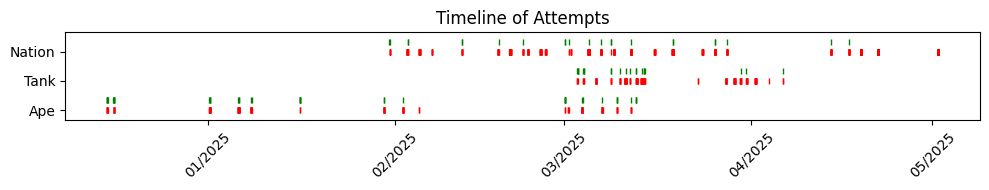

Green = Completed (Not necessarily PB)
Red = Reset


In [4]:
# Plot timeline of run attempts
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Setup the plot
fig, ax = plt.subplots(figsize=(10, 2))


for i in range(len(runners)):
    # Plot all events as line segments at y=0
    df = dfs[runners[i]]
    for _, row in df.iterrows():
        #ax.hlines(y=i, xmin=row['started'], xmax=row['ended'], color='steelblue', linewidth=4)
        completed = pd.notna(row['realTime'])
        if completed:
            ax.plot(row['started'], i*3 + 1, 'g|', markersize= 5)  # start
        else:
            ax.plot(row['started'], i*3, 'r|', markersize= 5)  # start
        #ax.plot(row['ended'], i, 'ro', markersize=5)    # end

# Formatting
ax.set_yticks(range(0, len(runners)*3, 3))  # Hide y-axis ticks
ax.set_yticklabels(runners)
ax.set_ylim(-1, 8) # Optional, for spacing
#ax.set_xlabel('Date')
ax.set_title('Timeline of Attempts')
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Tick at start of each month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))  # Format: 10/2024
plt.xticks(rotation=45)  # Rotate labels for readability
plt.tight_layout()
plt.show()

print('Green = Completed (Not necessarily PB)\nRed = Reset')


# PB History

In [5]:
def timeToSecs(timeStr):
    if timeStr == None:
        return None
    output = 0
    times = timeStr.split(':')
    output += 3600 * int(times[0])
    output += 60 * int(times[1])
    output += float(times[2])
    return output
    

In [6]:
completedDfs = {}
pbDfs = {}

for runner in runners:
    df = dfs[runner]
    completedDf = df[df['realTime'].notna()]
    completedDfs[runner] = completedDf


    completedDf['secs'] = completedDf['realTime'].apply(timeToSecs)
    completedDf['pb'] = False


    pb = 9999999
    for i, row in completedDf.iterrows():
        if (row['secs'] < pb):
            completedDf.at[i, 'pb'] = True
            pb = row['secs']

    pbDf = completedDf[completedDf['pb'] == True]
    pbDfs[runner] = pbDf

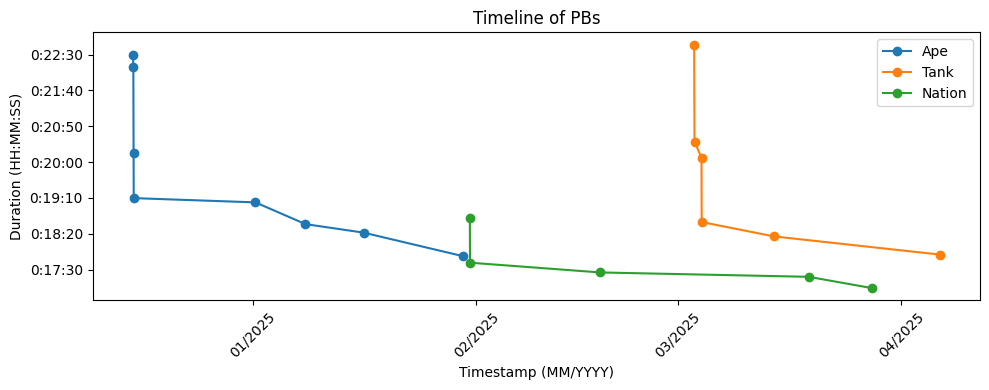

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import timedelta


# Create plot
fig, ax = plt.subplots(figsize=(10, 4))
for runner in runners:
    pbDf = pbDfs[runner]
    timestamps = pbDf['started']
    durations_in_seconds = pbDf['secs']
    ax.plot(timestamps, durations_in_seconds, marker='o', linestyle='-', label=runner)

# Y-axis: Format seconds to HH:MM:SS
def seconds_to_hhmmss(x, pos):
    td = timedelta(seconds=x)
    return str(td)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(seconds_to_hhmmss))

# X-axis: Format as MM/YYYY with ticks at month starts
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))

# Rotate labels
plt.xticks(rotation=45)
ax.set_title('Timeline of PBs')
ax.set_ylabel("Duration (HH:MM:SS)")
ax.set_xlabel("Timestamp (MM/YYYY)")
ax.legend()
plt.tight_layout()
plt.show()

# Resets by Split

In [8]:
incompletedDfs = {}

def getResetSplit(row, splitNames):
    last = None
    
    for split in reversed(splitNames):
        if pd.notna(row[split]):
            return last
        last = split
    return last
    
    
for runner in runners:
    df = dfs[runner]
    incompletedDf = df[df['realTime'].isna()]
    incompletedDfs[runner] = incompletedDf
    splitNames = list(incompletedDf.columns)[4:]
    
    resetSplits = incompletedDf.apply(lambda row: getResetSplit(row, splitNames), axis=1)
    counts = resetSplits.value_counts()
    print('-' * 10, runner, '-' * 10)
    print('Split', ' '*10, '# Resets')
    print('-' * (22 + len(runner)) )
    
    total = incompletedDf.shape[0]
    
    for split in splitNames:
        count = counts.get(split, 0)
        print(f'{split}:', ' ' * (15 - len(split)), count, f'({round(count / total * 100, 2)}%)')
        
    print('\n')
    
    
    

---------- Ape ----------
Split            # Resets
-------------------------
BoB (1):          80 (62.5%)
WF (6):           19 (14.84%)
CCM (8):          3 (2.34%)
DW (9):           17 (13.28%)
SSL (11):         2 (1.56%)
LLL (12):         0 (0.0%)
HMC (15):         0 (0.0%)
DDD (16):         3 (2.34%)
FS:               2 (1.56%)
BLJs:             0 (0.0%)
BITS:             2 (1.56%)


---------- Tank ----------
Split            # Resets
--------------------------
BOB (1):          55 (31.07%)
WF (6):           40 (22.6%)
CCM (8):          1 (0.56%)
BitDW (BOWSER):   37 (20.9%)
SSL (11):         4 (2.26%)
LLL (12):         1 (0.56%)
HMC (15):         3 (1.69%)
MIPS Clip:        5 (2.82%)
DDD (16):         1 (0.56%)
BitFS (BOWSER):   7 (3.95%)
BLJs:             1 (0.56%)
BitS:             22 (12.43%)


---------- Nation ----------
Split            # Resets
----------------------------
BoB (1):          270 (56.96%)
WF (6):           125 (26.37%)
CCM (8):          27 (5.7%)
DW (9):     

# Gold History

In [14]:
df = dfs['Ape']

splitNames = df.columns[4:]
for split in splitNames:
    goldDf = df[['started', split]]
    goldDf = goldDf[goldDf[split].notna()]
    goldDf['golded'] = False
    
    goldDf[split] = goldDf[split].apply(timeToSecs)
    print(goldDf.head())
print(splitNames)

              started     BoB (1)  golded
1 2024-12-15 08:06:26  106.030434   False
2 2024-12-15 08:31:45  126.491332   False
5 2024-12-15 08:59:51  126.154770   False
7 2024-12-15 09:14:54   99.657449   False
8 2024-12-15 09:40:29  128.241363   False
              started      WF (6)  golded
1 2024-12-15 08:06:26  244.534334   False
2 2024-12-15 08:31:45  260.719616   False
5 2024-12-15 08:59:51  202.485549   False
7 2024-12-15 09:14:54  246.573233   False
8 2024-12-15 09:40:29  213.367639   False
              started     CCM (8)  golded
1 2024-12-15 08:06:26   90.167398   False
2 2024-12-15 08:31:45   95.267435   False
5 2024-12-15 08:59:51   86.749956   False
7 2024-12-15 09:14:54  102.195354   False
8 2024-12-15 09:40:29   87.117172   False
              started      DW (9)  golded
1 2024-12-15 08:06:26  207.667835   False
2 2024-12-15 08:31:45  133.282588   False
7 2024-12-15 09:14:54  133.333491   False
8 2024-12-15 09:40:29  132.723105   False
9 2024-12-15 10:06:57  186.234270 